In [1]:
import pandas as pd 
import seaborn as sns 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import datetime
import plotly.express as px
import plotly.graph_objs as go

In [2]:
AgeGroup = pd.read_csv('AgeGroupDetails.csv')
CovidIndia = pd.read_csv('covid_19_india.csv',parse_dates=True,squeeze=True)
HospitalBeds = pd.read_csv('HospitalBedsIndia.csv')
ICMRTesting = pd.read_csv('ICMRTestingDetails.csv')
IndividualDetails = pd.read_csv('IndividualDetails.csv')
PopulationCensus = pd.read_csv('population_india_census2011.csv')

In [3]:
indx_maxAgeGroup = AgeGroup['TotalCases'].idxmax()

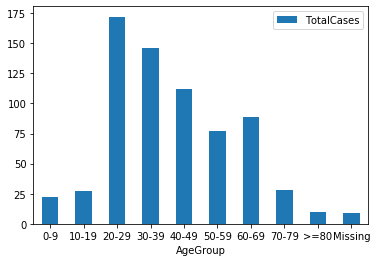

In [4]:
AgeGroupPlot = AgeGroup.plot.bar(x='AgeGroup', y='TotalCases', rot=0)

In [5]:
print('Age Group with maximum cases is {} with {} cases, constituting {} of total cases'.format(AgeGroup['AgeGroup'][indx_maxAgeGroup],AgeGroup['TotalCases'][indx_maxAgeGroup],AgeGroup['Percentage'][indx_maxAgeGroup]))

Age Group with maximum cases is 20-29 with 172 cases, constituting 24.86% of total cases


In [6]:
time = CovidIndia['Date']
ConfirmedCases = CovidIndia['Confirmed']
StateWiseData = CovidIndia.groupby(["State/UnionTerritory"])

In [7]:
now  = datetime.datetime.now()
CovidIndia['Date'] = pd.to_datetime(CovidIndia['Date'], format='%d/%m/%y')
CovidIndia=CovidIndia[['Date','State/UnionTerritory','Cured','Deaths','Confirmed']]
Spread = CovidIndia.groupby(['Date', 'State/UnionTerritory'])['Confirmed'].sum().reset_index().sort_values('Confirmed', ascending=False)

/home/kamesh-k/anaconda3/envs/ML/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



Text(0.5, 1.0, 'India Confirmed cases')

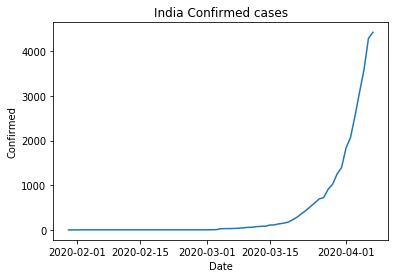

In [50]:
graph = CovidIndia.groupby('Date')['Cured', 'Deaths', 'Confirmed'].sum().reset_index()
sns.lineplot(graph['Date'],graph['Confirmed']).set_title("India Confirmed cases")

In [33]:
spread = CovidIndia.groupby(['Date', 'State/UnionTerritory'])['Confirmed'].sum().reset_index().sort_values('Date', ascending=True).sort_values('Confirmed', ascending=True)
fig = px.area(spread, x="Date", y="Confirmed",color='State/UnionTerritory',title='Pan India State Wise Confirmed over time',height=500,
              color_discrete_sequence = px.colors.cyclical.Edge)
fig.update_layout(plot_bgcolor='rgb(275, 270, 273)',width=700, height=600)

In [45]:
spread= spread.sort_values('Date', ascending=True)
fig = px.line(spread, x="Date", y="Confirmed",color='State/UnionTerritory',title='State Wise Confirmed over time',height=500,
              color_discrete_sequence = px.colors.cyclical.HSV)
fig.update_layout(plot_bgcolor='rgb(275, 270, 273)',width=700, height=600)

/home/kamesh-k/anaconda3/envs/ML/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



Text(0.5, 1.0, 'India Cured cases')

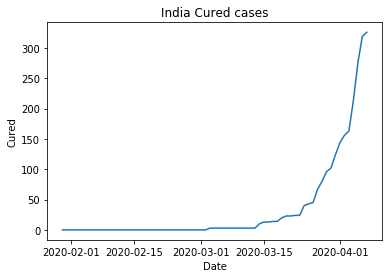

In [52]:
graph = CovidIndia.groupby('Date')['Cured', 'Deaths', 'Confirmed'].sum().reset_index()
sns.lineplot(graph['Date'],graph['Cured']).set_title("India Cured cases")

In [48]:
spread = CovidIndia.groupby(['Date', 'State/UnionTerritory'])['Cured'].sum().reset_index().sort_values('Date', ascending=True)
fig = px.area(spread, x="Date", y="Cured",color='State/UnionTerritory',title='Pan India State Wise Cured over time',height=500,
              color_discrete_sequence = px.colors.cyclical.Edge)
fig.update_layout(plot_bgcolor='rgb(275, 270, 273)',width=700, height=600)

In [49]:
spread = CovidIndia.groupby(['Date', 'State/UnionTerritory'])['Cured'].sum().reset_index().sort_values('Date', ascending=True)
fig = px.line(spread, x="Date", y="Cured",color='State/UnionTerritory',title='Pan India State Wise Spread over time',height=500,
              color_discrete_sequence = px.colors.cyclical.HSV)
fig.update_layout(plot_bgcolor='rgb(275, 270, 273)',width=700, height=600)